In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_train[9].shape

(28, 28)

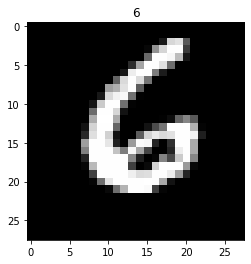

In [5]:
plt.imshow(X_train[90], cmap="gray")
plt.title(y_train[90])
plt.show()

In [6]:
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_train[101].shape

(784,)

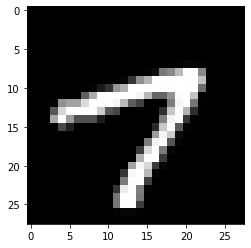

In [9]:
plt.imshow(X_train[101].reshape(28,28), cmap="gray")
plt.show()

# Neural Network Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add( Dense(units=500, activation='relu', input_shape=(784,) ) )
model.add( Dense(units=300, activation='relu') )
model.add( Dense(units=100, activation='relu'))
model.add( Dense(units=32, activation='relu') )
model.add( Dense(units=10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 576,462
Trainable params: 576,462
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [14]:
y_train[90]

6

In [15]:
from keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train)

In [17]:
y_train.shape

(60000, 10)

In [18]:
y_test = to_categorical(y_test)

In [19]:
y_test.shape

(10000, 10)

# Actual Training

In [20]:
his = model.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_split=0.2 )

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 2.2159 - accuracy: 0.5750 - val_loss: 0.3242 - val_accuracy: 0.9158
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2777 - accuracy: 0.9300 - val_loss: 0.2088 - val_accuracy: 0.9496
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1624 - accuracy: 0.9575 - val_loss: 0.1583 - val_accuracy: 0.9596
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1294 - accuracy: 0.9656 - val_loss: 0.1417 - val_accuracy: 0.9630
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1000 - accuracy: 0.9729 - val_loss: 0.1426 - val_accuracy: 0.9638
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0846 - accuracy: 0.9761 - val_loss: 0.1394 - val_accuracy: 0.9631
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0723 - accuracy: 0.9804 - val_loss: 0.2074 - val_accuracy:

In [21]:
his

In [22]:
history = his.history

In [23]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

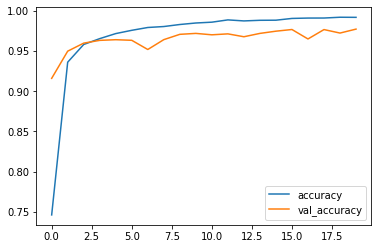

In [24]:
plt.plot(history['accuracy'], label="accuracy")
plt.plot(history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

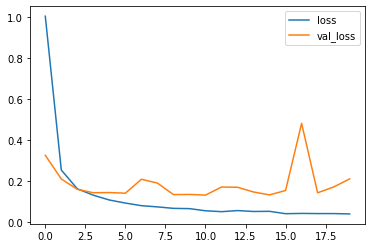

In [25]:
plt.plot(history['loss'], label="loss")
plt.plot(history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2419 - accuracy: 0.9775


[0.24193164706230164, 0.9775000214576721]

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred.shape

(10000, 10)

In [29]:
np.argmax(y_pred[888])

2

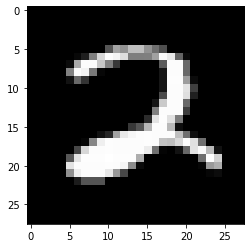

In [30]:
plt.imshow(X_test[888].reshape(28,28), cmap="gray")
plt.show()

In [31]:
model.save("mnist_model.h5")

# Load Keras Model

In [32]:
from keras.models import load_model

In [33]:
new_model = load_model("./mnist_model.h5")

In [34]:
new_model

In [35]:
new_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2419 - accuracy: 0.9775


[0.24193164706230164, 0.9775000214576721]